In [16]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

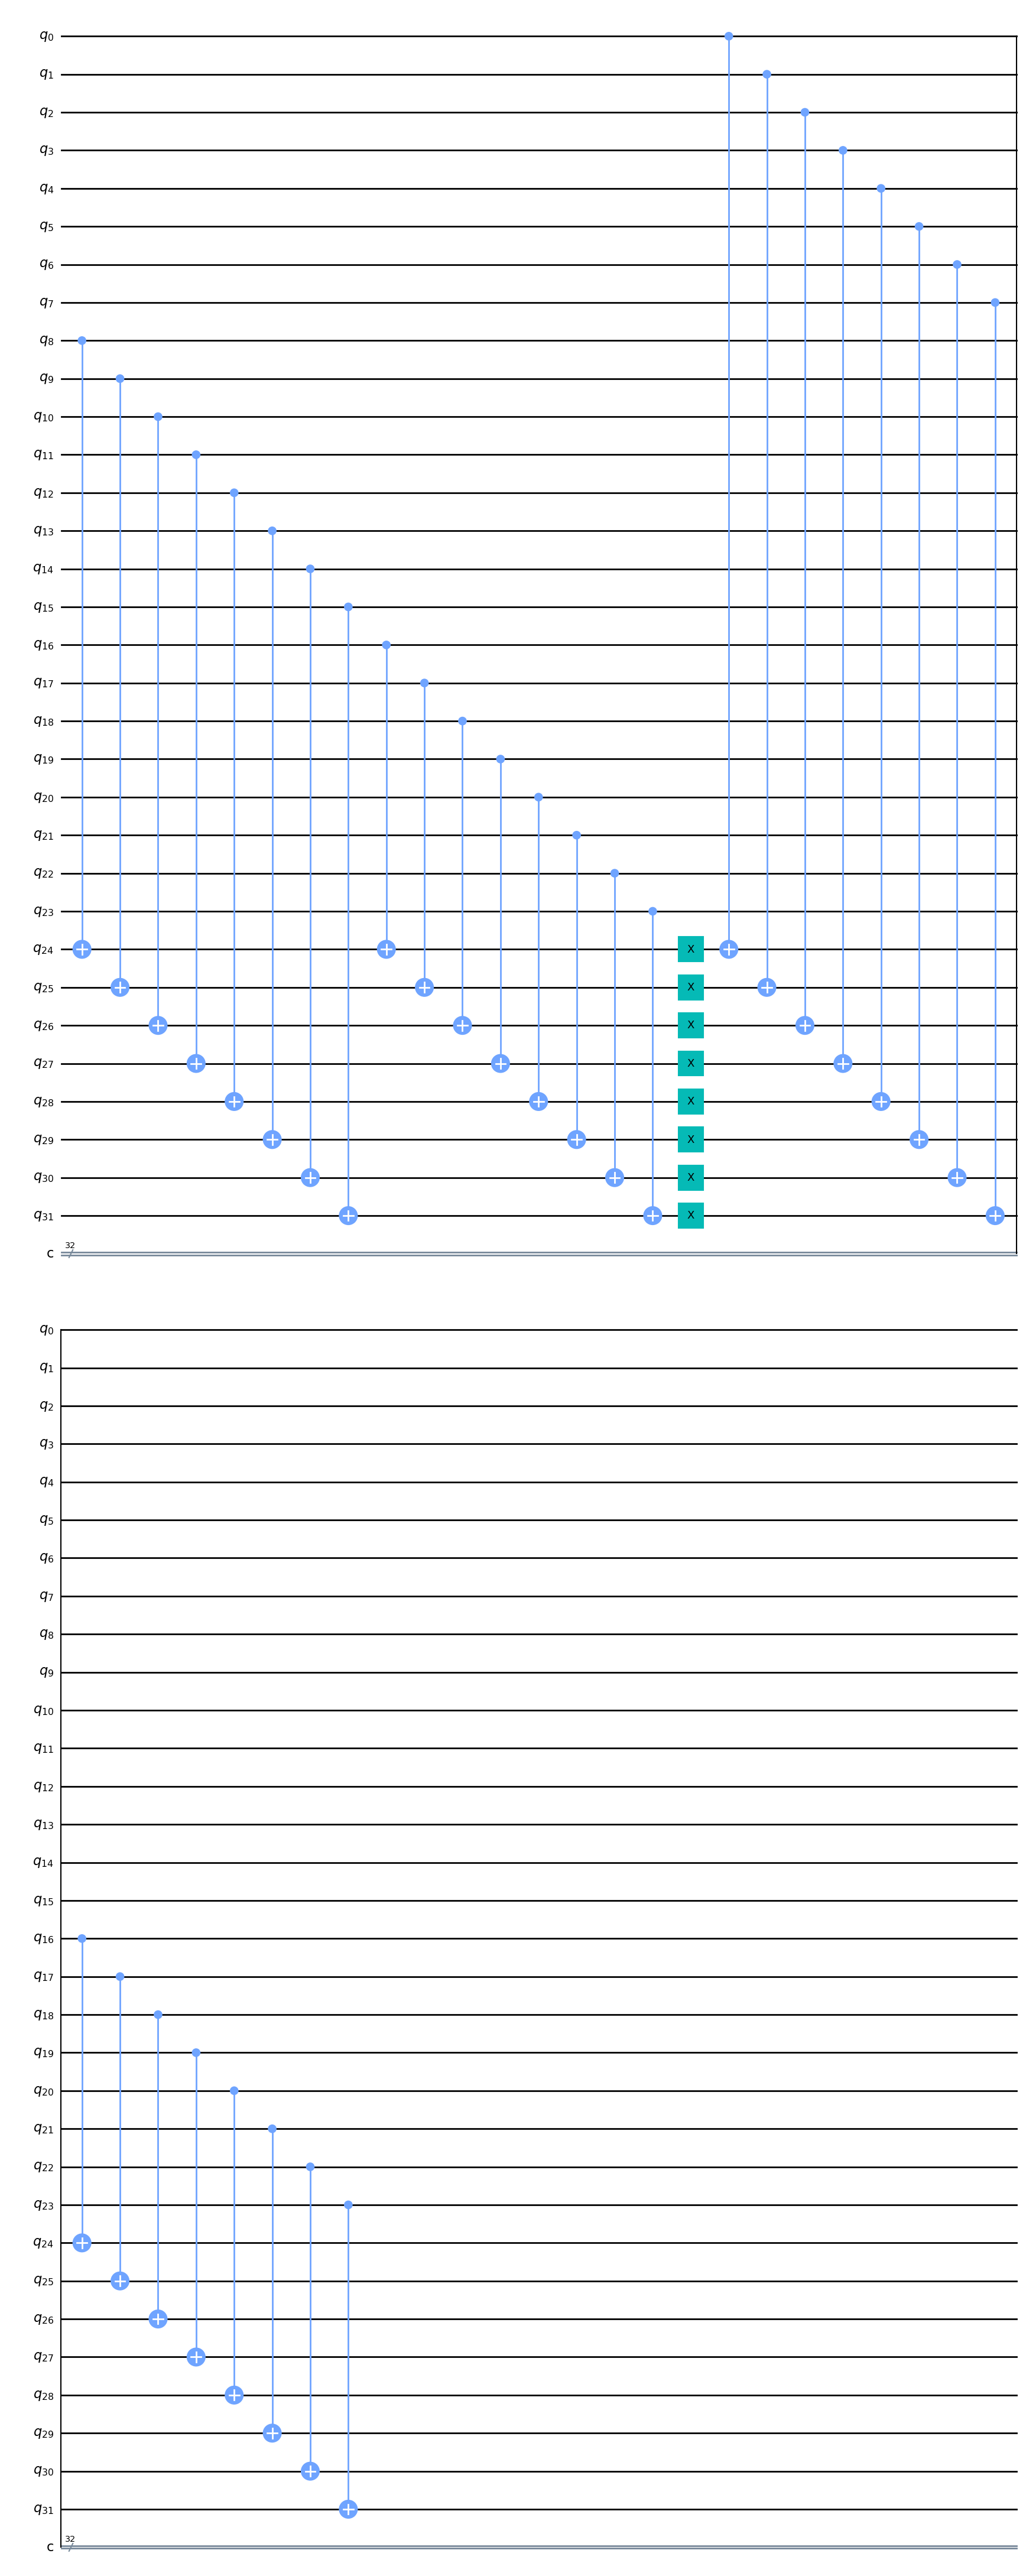

In [17]:
# function F
def F(b: int, c: int, d: int) -> int:
    return d ^ (b & (c ^ d))

qc1 = QuantumCircuit(32,32)

for i in range(8):
    
    # c ^ d (c xor d)
    qc1.cx(8+i,24+i)
    qc1.cx(16+i,24+i)
    
    # b & (b and)
    qc1.x(24+i)
    qc1.cx(i,24+i)
    
    # d ^ (d xor )
    qc1.cx(16+i,24+i)
    

qc1.draw()

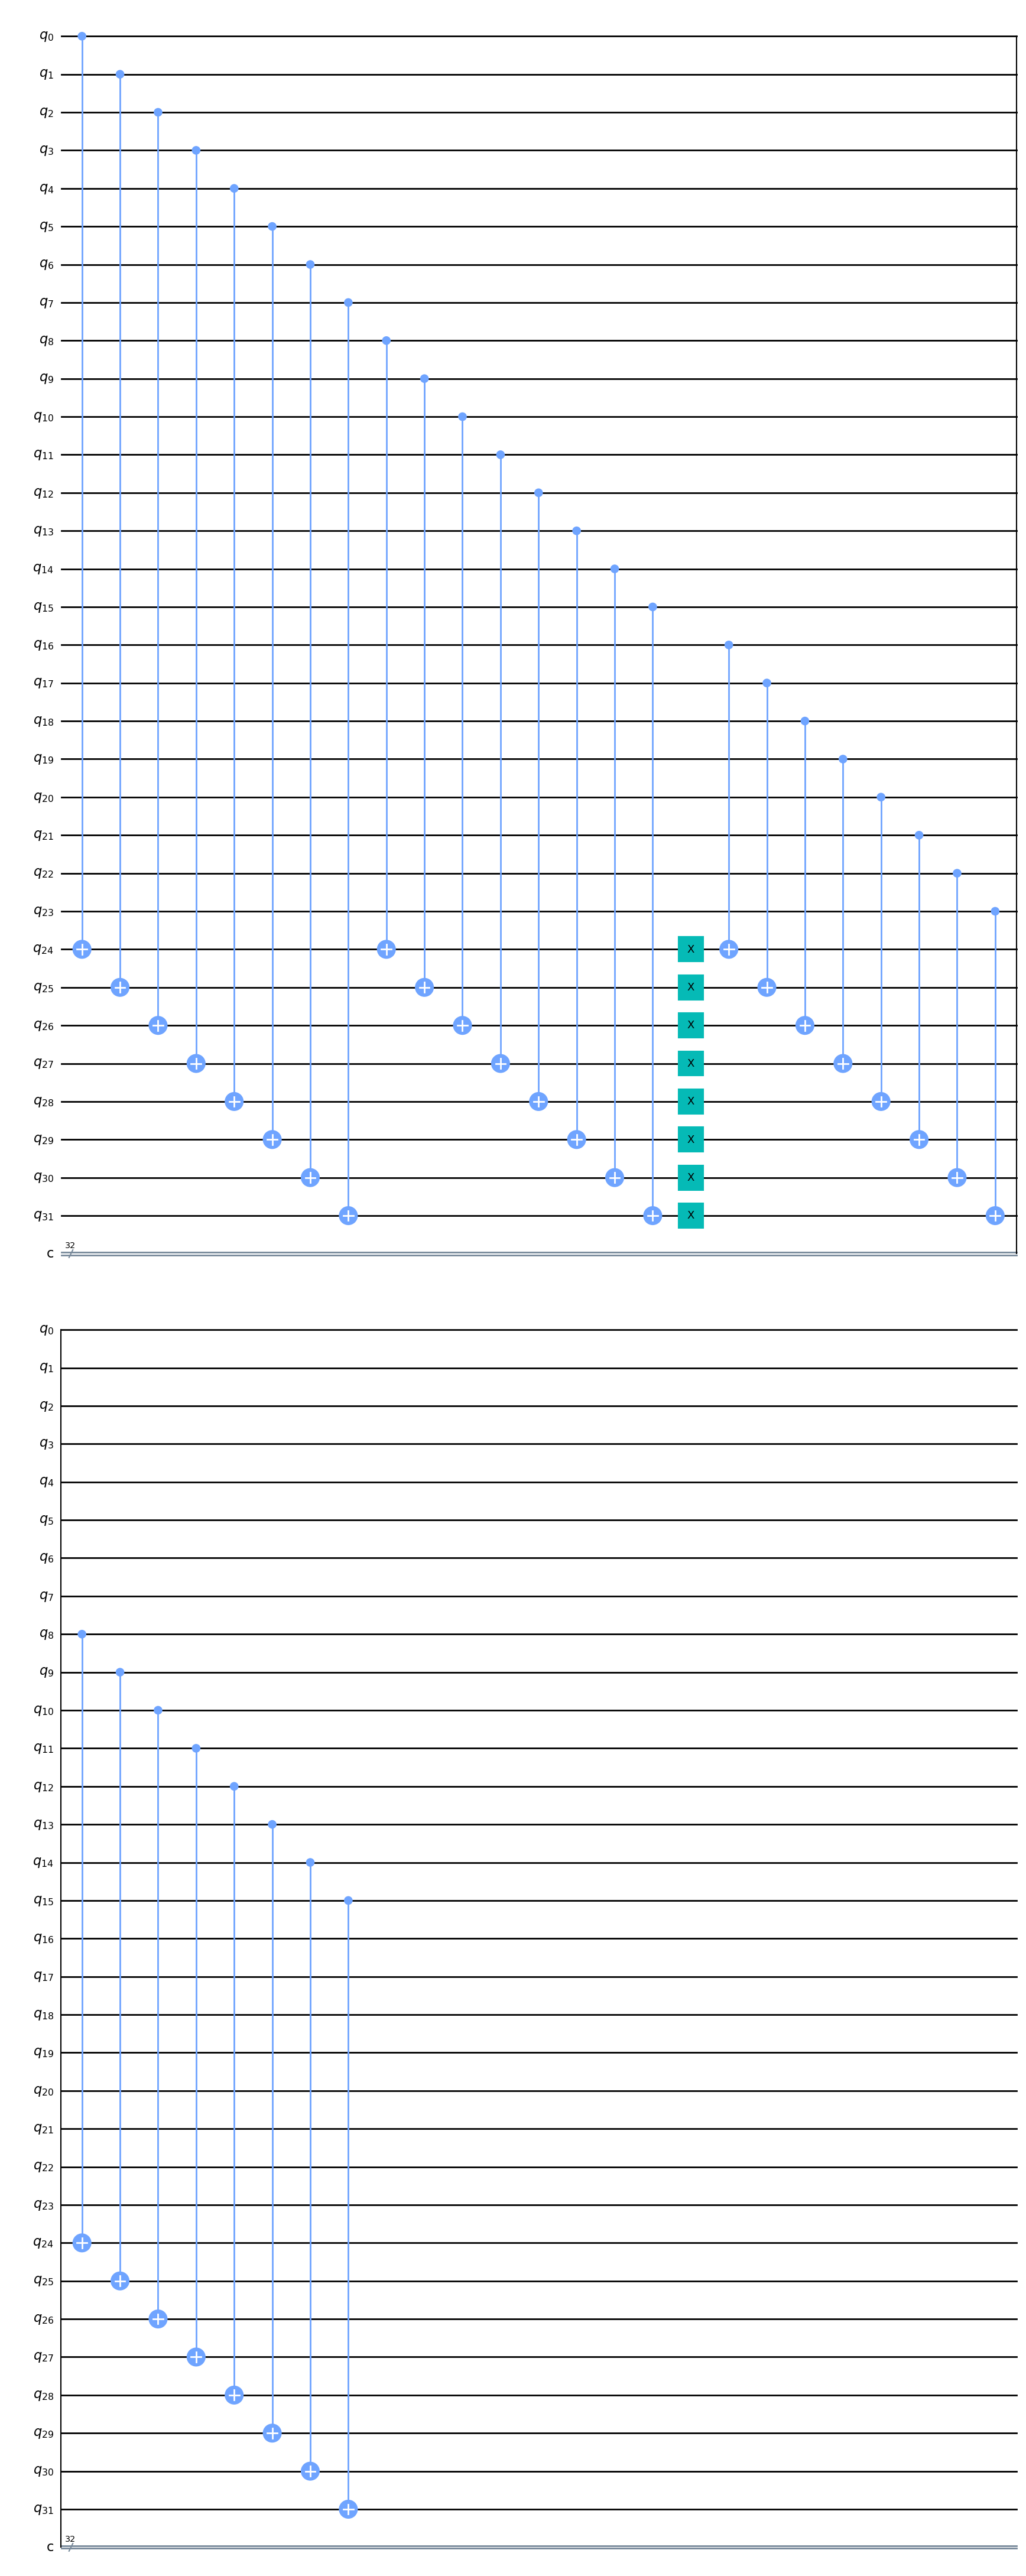

In [18]:
# Function G
def G(b: int, c: int, d: int) -> int:
    return c ^ (d & (b ^ c))

qc2 = QuantumCircuit(32,32)

for i in range(8):
    
    # b ^ c (b xor c)
    qc2.cx(i,24+i)
    qc2.cx(8+i,24+i)
    
    # d & (d and )
    qc2.x(24+i)
    qc2.cx(16+i,24+i)
    
    # c ^ (c xor )
    qc2.cx(8+i,24+i)
    

qc2.draw()


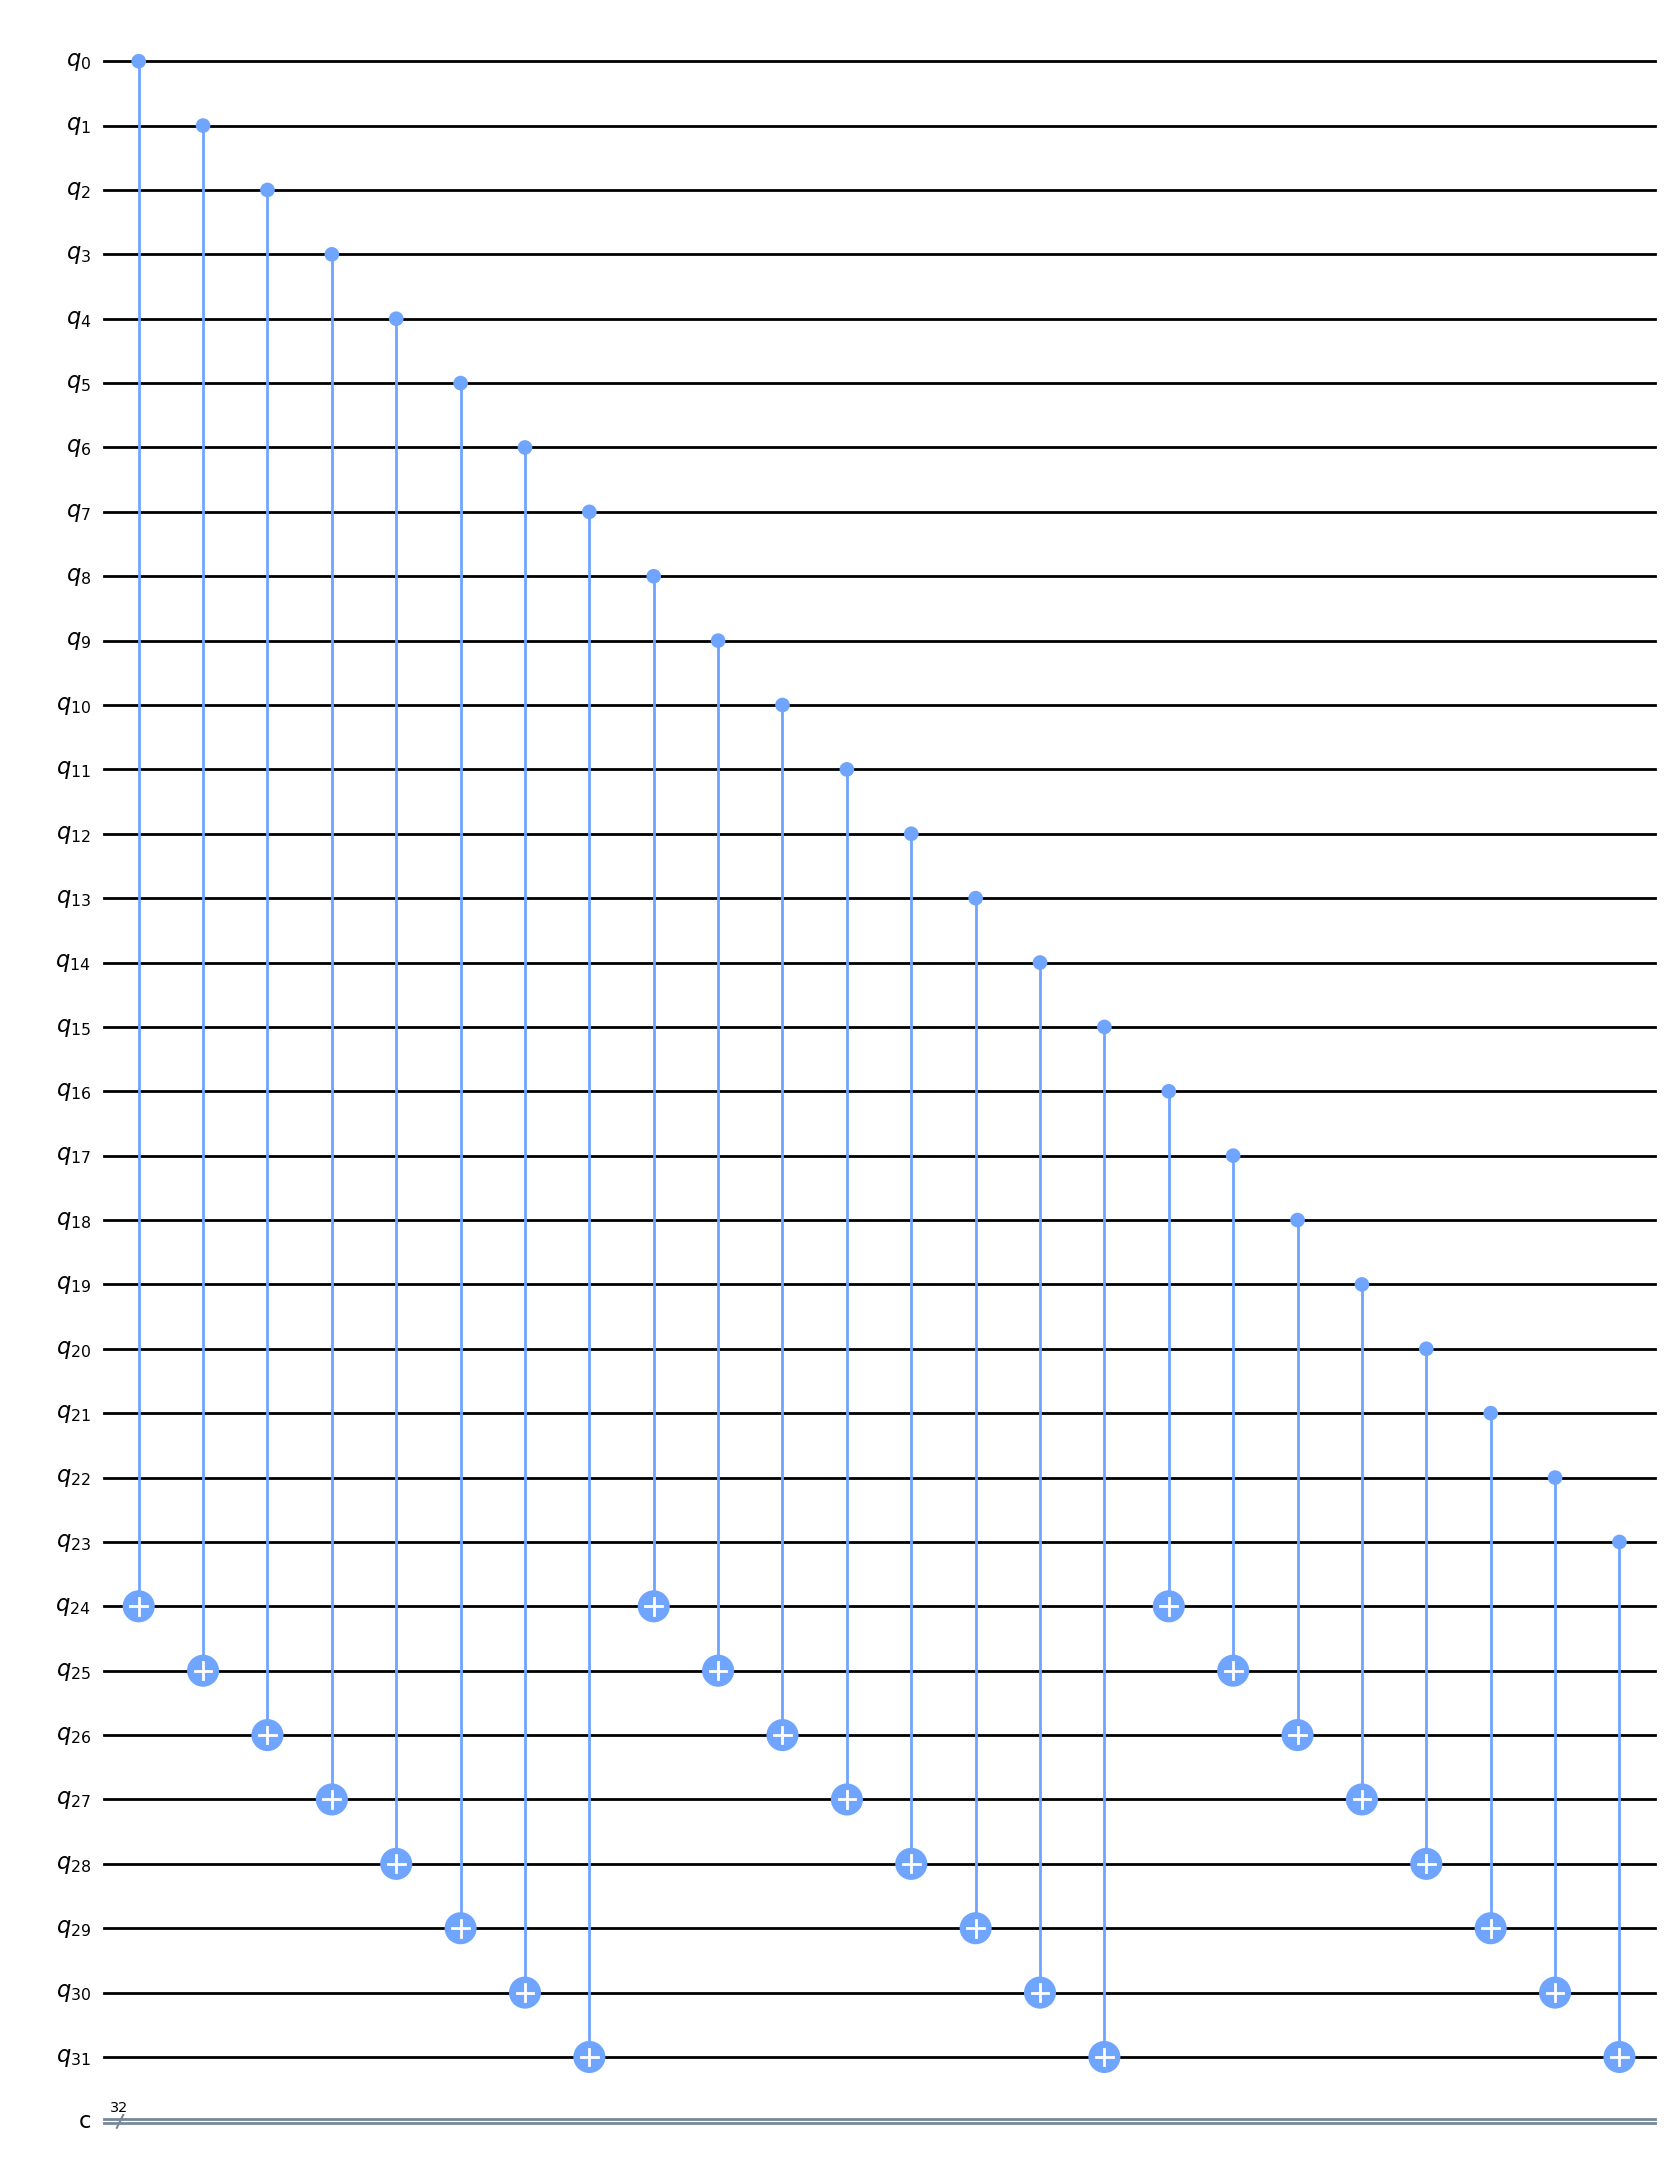

In [19]:
# Function H
def H(b: int, c: int, d: int) -> int:
    return b ^ c ^ d

qc3 = QuantumCircuit(32,32)

for i in range(8):
    
    # b ^ c (b xor c)
    qc3.cx(i,24+i)
    qc3.cx(8+i,24+i)
    
    # ^ d (xor d)
    qc3.cx(16+i,24+i)

qc3.draw()

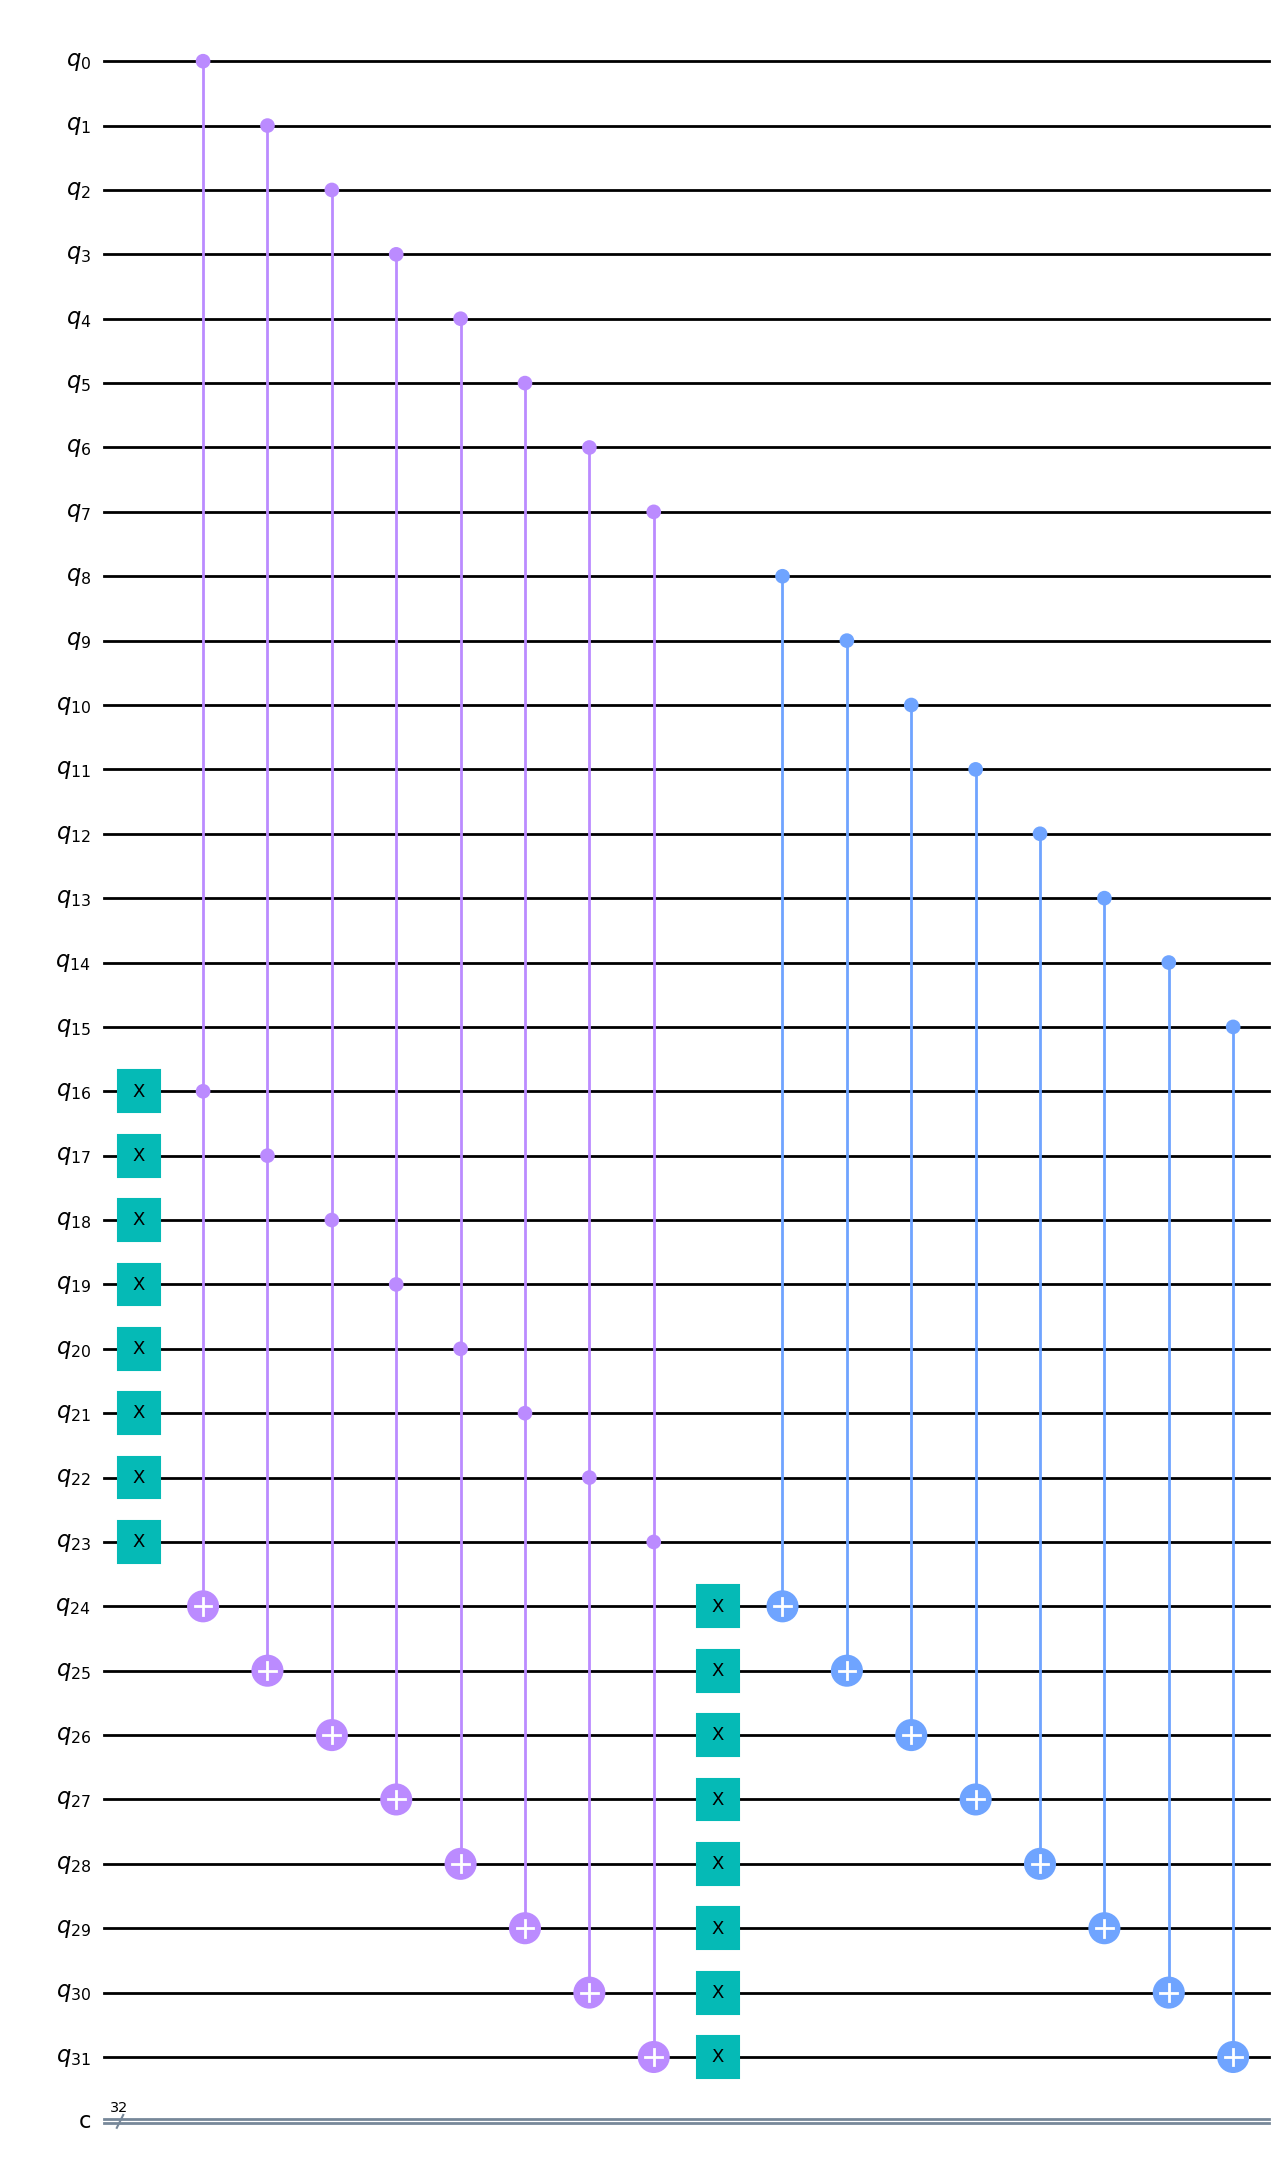

In [20]:
# Function I
def I(b: int, c: int, d: int) -> int:
    return c ^ (b | bit_not(d))

qc4 = QuantumCircuit(32,32)

for i in range(8):

    # not d
    qc4.x(16+i)

    # b | (b or) 
    qc4.ccx(i,16+i,24+i)
    qc4.x(24+i)

    # c ^ (c xor)
    qc4.cx(8+i,24+i)
    
qc4.draw()